# Logistic Regression


## _Introduction_
- Logistic Regression is a famous classifier still used frequently despite its age. While it is a regression, it operates as a classifier by estimating probabilities of class membership. 
- While it can be generalized to multiple classes, Logistic Regression is primarily used to predict binary outcomes with two classes such as :
    - Whether or not a user will purchase a product given their demographic characteristics
    - Diagnosing a patient with a disease or not, given their symptoms
    - Predicting whether a person will default on a loan and with what likelihood
    - The likelihood of a student being admitted to a college, given their scores and the characteristics of the college (this notebook)

In [72]:
# Data Mining
import pandas as pd
import json
import numpy as np
from scipy import stats

# Modeling
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.formula.api as sm

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
colors = {'blue': '#729ECE','brown': '#A8786E','green': '#67BF5C','grey': '#A2A2A2','orange': '#FF9E4A',
          'pink': '#ED97CA','purple': '#AD8BC9','red': '#ED665D','teal': '#6DCCDA','yellow': '#CDCC5D'}

# set max printout options for pandas:
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

# Predicting Binary Classes 

### _Linear Regression Models AND Logsitc Regression Models :_
  - Construct formulas with predictor variables and coefficients to estimate the expected value of the target variable 
  - Can be solved by the minimization of the sum of squared errors 
### _However..._ 
- ** Linear Regression ** predicts targets that fall in **[-infinity,infinity]** range
- **Logistic Regression** predicts binary classes whose targets fall within **[0,1]** range and represent probabilities of class membership


## Logit Link Functions

- In order to solve for binary classes, **Logit Link Functions** must be applied to both sides of model equation that transform regression to  : 
   - Predict any negative or positive number
   - Present predicted values as probability 
   - Constrain predicted values to desired range [0,1]


- Technically speaking, the logit link function is the combination of converting the probability to an odds ratio and taking the logarithms of that. By inverting the logit, the regression equation can solve explicitly for probability, detailed in the three steps below:
   > ### 1) Converting Probabilities to Odds Ratios 
        > - **Odds Ratios** are measures of how many times more likely it is than the inverse case, derived from the formula above (p = probability).
        > - Range of predicted values becomes **[0,infinity]**
        >  $$\text{odds ratio}(p) = \frac{p}{1-p}$$
   
  > ### 2) Converting Odds Ratios to Log-Odds
    - **Log-Odds** are the natural logarithms of odds ratios. Taking the natural logarithm of a fraction will result in a negative number.
    - Range of predicted values becomes **[-infinity, infinity]**

  > ### 3) Inverting Log-Odds with Logistic Function
    - The **Logistic Function** is the inverse of the logit. 
    - Regression equation transformed to **solve for probabilities** 

# Predicting College Admittance 
### _Loading Admissions Data_
> - *admit*: 
    indicaties whether student was admitted (binary- 0 or 1)
> - *gre*: student's GRE score
> - *gpa*: student's GPA
> - *prestige*: rating for college's prestige

In [73]:
data = pd.read_csv('./admissions.csv')
data.head(3)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0


In [74]:
# Checking for null values 
data.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [75]:
# Dropping null values 
data.dropna(inplace=True)

In [76]:
# Inflating size of data - artificially increasing signal in data
data = data[data.prestige == 1]

data = pd.concat([data]*10, axis=0)

data.loc[data.admit == 1, 'gpa'] += np.random.random(size=data[data.admit == 1].shape[0])
data.loc[data.admit == 0, 'gpa'] -= np.random.random(size=data[data.admit == 0].shape[0])

# _Using Linear Regression_
- Using Scikit-Learn's Linear Regression class
- Predicting the binary indicator `admit` using `gpa`   
- Coefficients/intercepts are uninterpretable 
  - Predictions for 0.6 admitted - can't be 60% admitted 
  - Predictions for 3.8+ GPAs getting rejected - highly unlikely 

In [79]:
# Setting X and Y Variables 
y = data.admit.values
X = data[['gpa']].values

# Fitting Linear Regression Model 
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

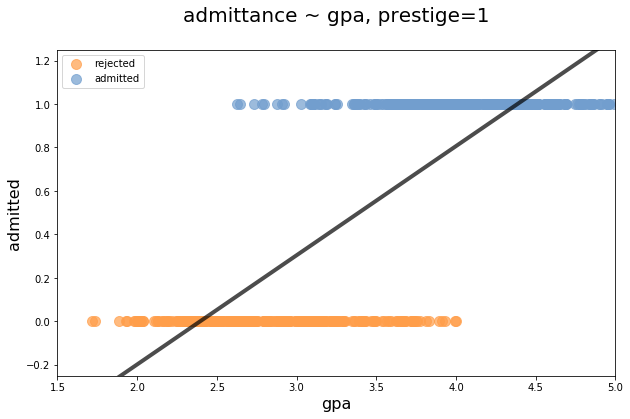

In [80]:
# Plotting
fig, ax = plt.subplots(figsize=(10,6))

# Plot the regression line for admit ~ gpa.
x_vals = np.linspace(1.,5.,300)
ax.plot(x_vals, linreg.predict(x_vals[:, np.newaxis]),
        color='black', alpha=0.7, lw=4)

# Do one scatter plot for each type of wine:
ax.scatter(data.gpa[data.admit == 0],
           data.admit[data.admit == 0],
           c=colors['orange'], s=100, alpha=0.7,
           label='rejected')

ax.scatter(data.gpa[data.admit == 1],
           data.admit[data.admit == 1],
           c=colors['blue'], s=100, alpha=0.7,
           label='admitted')

ax.set_ylabel('admitted', fontsize=16)
ax.set_xlabel('gpa', fontsize=16)
ax.set_title('admittance ~ gpa, prestige=1\n', fontsize=20)

ax.set_xlim([1.5,5])
ax.set_ylim(-0.25, 1.25)

plt.legend(loc='upper left')
plt.show()

# _Using Logistic Regression_
- Using Scikit-Learn's Logistic Regression class 
- Predicting binary indicator `admit` using `gpa` 

In [81]:
# Setting X and Y Variables 
y = data.admit.values
X = data[['gpa']].values

# Fitting Logistic Regression Model 
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

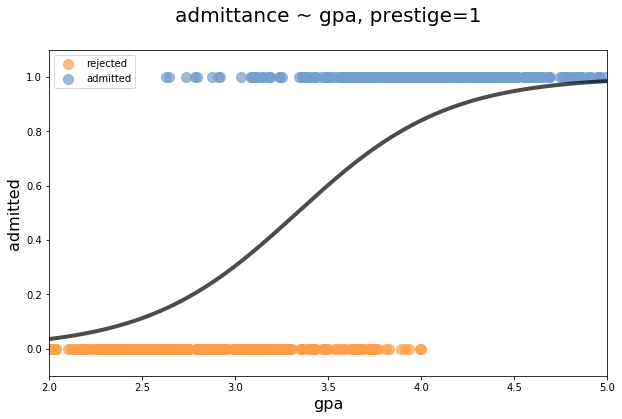

In [82]:
# Plotting
fig, ax = plt.subplots(figsize=(10,6))

x_vals = np.linspace(-1.,5.,300)
y_pp = logreg.predict_proba(x_vals[:, np.newaxis])[:,1]

ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

# Create one scatterplot for each type of wine:
ax.scatter(data.gpa[data.admit == 0],
           data.admit[data.admit == 0],
           c=colors['orange'], s=100, alpha=0.7,
           label='rejected')

ax.scatter(data.gpa[data.admit == 1],
           data.admit[data.admit == 1],
           c=colors['blue'], s=100, alpha=0.7,
           label='admitted')


ax.set_ylabel('admitted', fontsize=16)
ax.set_xlabel('gpa', fontsize=16)
ax.set_title('admittance ~ gpa, prestige=1\n', fontsize=20)

ax.set_xlim([2.,5.])
ax.set_ylim([-0.1, 1.1])

plt.legend(loc='upper left')
plt.show()

## _Interpreting Coefficients_
- Centering predictor variables sets baseline equal to the mean
    - Avergae gpa = 0 
- Get probability at different $\beta$ values via logistic transformation, created as been instantiated as a function below that does the following : 
    > - Summing the regression
    > - Exponentiating the regression sum
    > - Taking the odds ratio 

In [68]:
# Centering coefficients 
Xc = X - X.mean()

# Fitting Logistic Regression
logreg = LogisticRegression()
logreg.fit(Xc, y)

# Creating function for logistic transformation
def logistic_transformation(gpa, b0, b1):
    regression_sum = b0 + b1*gpa
    exponentiated = np.exp(regression_sum)
    return exponentiated / (1 + exponentiated)

### _Admittance Probabilities_ 

In [69]:
# Because predictor variables centered
    # average gpa = 0 
print('Average GPA Admittance Probability :')
print(logistic_transformation(0,logreg.intercept_[0],logreg.coef_[0][0]))

Average GPA Admittance Probability :
0.5718876522937244


In [70]:
# Because predictor variables are centered
    # average gpa = 0 
    # 3.0 GPA = -0.5
print('Below Average GPA Admittance Probability (~3.0):')
print(logistic_transformation(-.5, logreg.intercept_[0], logreg.coef_[0][0]))

Below Average GPA Admittance Probability (~3.0):
0.17024159694432942


In [71]:
# Because predictor variables are centered
    # average gpa = 0 
    # 3.8 GPA = 0.3
print('Above Average GPA Admittance Probability (~3.8):')
print(logistic_transformation(.3, logreg.intercept_[0], logreg.coef_[0][0]))

Above Average GPA Admittance Probability (~3.8):
0.8043395333940668
